In [14]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [15]:
import pandas as pd

file_path = '/content/drive/MyDrive/binary_classification_datasets.xlsx'
loan_approval_df = pd.read_excel(file_path, sheet_name='Loan Approval')
medical_diagnosis_df = pd.read_excel(file_path, sheet_name='Medical Diagnosis')
student_performance_df = pd.read_excel(file_path, sheet_name='Student Performance')

print("Loan Approval Dataset:")
print(loan_approval_df.head())

print("Medical Diagnosis Dataset:")
print(medical_diagnosis_df.head())

print("Student Performance Dataset:")
print(student_performance_df.head())


Loan Approval Dataset:
    Age    Income  Credit Score  Loan Amount  Employment Status  \
0  53.0       NaN         741.0      21572.0                1.0   
1  20.0   83010.0         542.0       9135.0                0.0   
2   NaN   27160.0         693.0      12963.0                1.0   
3  42.0       NaN         783.0          NaN                1.0   
4  61.0  147390.0         566.0      13207.0                0.0   

   Marital Status  Loan Approval  
0             1.0            1.0  
1             0.0            0.0  
2             NaN            0.0  
3             1.0            0.0  
4             1.0            1.0  
Medical Diagnosis Dataset:
    Age  Blood Pressure  Cholesterol Level        BMI  Smoking  \
0  31.0            96.0              213.0  38.350882      1.0   
1  25.0           149.0              147.0  34.711467      0.0   
2  20.0           107.0              294.0  21.518329      0.0   
3  53.0           134.0              269.0  27.302961      0.0   
4  40.0

In [16]:
#Handling missing data b
loan_approval_df['Age'].fillna(loan_approval_df['Age'].mean(), inplace=True)
loan_approval_df['Income'].fillna(loan_approval_df['Income'].mean(), inplace=True)
loan_approval_df['Credit Score'].fillna(loan_approval_df['Credit Score'].mean(), inplace=True)
loan_approval_df['Loan Amount'].fillna(loan_approval_df['Loan Amount'].mean(), inplace=True)
loan_approval_df['Employment Status'].fillna(loan_approval_df['Employment Status'].mode()[0], inplace=True)
loan_approval_df['Marital Status'].fillna(loan_approval_df['Marital Status'].mode()[0], inplace=True)
loan_approval_df['Loan Approval'].fillna(loan_approval_df['Loan Approval'].mode()[0], inplace=True)

# Medical Diagnosis Dataset
medical_diagnosis_df['Age'].fillna(medical_diagnosis_df['Age'].mean(), inplace=True)
medical_diagnosis_df['Blood Pressure'].fillna(medical_diagnosis_df['Blood Pressure'].mean(), inplace=True)
medical_diagnosis_df['Cholesterol Level'].fillna(medical_diagnosis_df['Cholesterol Level'].mean(), inplace=True)
medical_diagnosis_df['BMI'].fillna(medical_diagnosis_df['BMI'].mean(), inplace=True)
medical_diagnosis_df['Smoking'].fillna(medical_diagnosis_df['Smoking'].mode()[0], inplace=True)
medical_diagnosis_df['Physical Activity'].fillna(medical_diagnosis_df['Physical Activity'].mode()[0], inplace=True)
medical_diagnosis_df['Disease'].fillna(medical_diagnosis_df['Disease'].mode()[0], inplace=True)

# Student Performance Dataset
student_performance_df['Study Hours'].fillna(student_performance_df['Study Hours'].mean(), inplace=True)
student_performance_df['Attendance Rate'].fillna(student_performance_df['Attendance Rate'].mean(), inplace=True)
student_performance_df['Previous Scores'].fillna(student_performance_df['Previous Scores'].mean(), inplace=True)
student_performance_df['Part-time Job'].fillna(student_performance_df['Part-time Job'].mode()[0], inplace=True)
student_performance_df['Parental Education'].fillna(student_performance_df['Parental Education'].mode()[0], inplace=True)
student_performance_df['Extra Coaching'].fillna(student_performance_df['Extra Coaching'].mode()[0], inplace=True)
student_performance_df['Passed'].fillna(student_performance_df['Passed'].mode()[0], inplace=True)

# Confirm missing values are handled
print(loan_approval_df.isnull().sum())
print(medical_diagnosis_df.isnull().sum())
print(student_performance_df.isnull().sum())


Age                  0
Income               0
Credit Score         0
Loan Amount          0
Employment Status    0
Marital Status       0
Loan Approval        0
dtype: int64
Age                  0
Blood Pressure       0
Cholesterol Level    0
BMI                  0
Smoking              0
Physical Activity    0
Disease              0
dtype: int64
Study Hours           0
Attendance Rate       0
Previous Scores       0
Part-time Job         0
Parental Education    0
Extra Coaching        0
Passed                0
dtype: int64


In [17]:
from sklearn.preprocessing import StandardScaler

loan_approval_numeric_cols = ['Age', 'Income', 'Credit Score', 'Loan Amount']
medical_diagnosis_numeric_cols = ['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI']
student_performance_numeric_cols = ['Study Hours', 'Attendance Rate', 'Previous Scores']
scaler = StandardScaler()

loan_approval_df[loan_approval_numeric_cols] = scaler.fit_transform(loan_approval_df[loan_approval_numeric_cols])
medical_diagnosis_df[medical_diagnosis_numeric_cols] = scaler.fit_transform(medical_diagnosis_df[medical_diagnosis_numeric_cols])
student_performance_df[student_performance_numeric_cols] = scaler.fit_transform(student_performance_df[student_performance_numeric_cols])

loan_approval_df['Employment Status'] = loan_approval_df['Employment Status'].astype(int)
loan_approval_df['Marital Status'] = loan_approval_df['Marital Status'].astype(int)

medical_diagnosis_df['Smoking'] = medical_diagnosis_df['Smoking'].astype(int)
medical_diagnosis_df['Physical Activity'] = medical_diagnosis_df['Physical Activity'].astype(int)

student_performance_df['Part-time Job'] = student_performance_df['Part-time Job'].astype(int)
student_performance_df['Parental Education'] = student_performance_df['Parental Education'].astype(int)
student_performance_df['Extra Coaching'] = student_performance_df['Extra Coaching'].astype(int)

print(loan_approval_df.head())
print(medical_diagnosis_df.head())
print(student_performance_df.head())


            Age    Income  Credit Score   Loan Amount  Employment Status  \
0  8.937540e-01  0.000000      1.065260 -3.915993e-01                  1   
1 -1.624553e+00 -0.011995     -0.288754 -1.380362e+00                  0   
2 -5.422317e-16 -1.571703      0.738664 -1.076029e+00                  1   
3  5.431839e-02  0.000000      1.351032 -2.892254e-16                  1   
4  1.504253e+00  1.785927     -0.125456 -1.056631e+00                  0   

   Marital Status  Loan Approval  
0               1            1.0  
1               0            0.0  
2               0            0.0  
3               1            0.0  
4               1            1.0  
        Age  Blood Pressure  Cholesterol Level       BMI  Smoking  \
0 -1.081714       -1.539383           0.168323  1.448490        1   
1 -1.438869        0.562332          -1.037893  0.824712        0   
2 -1.736498       -1.103178           1.648679 -1.436528        0   
3  0.227854       -0.032493           1.191779 -0.445070 

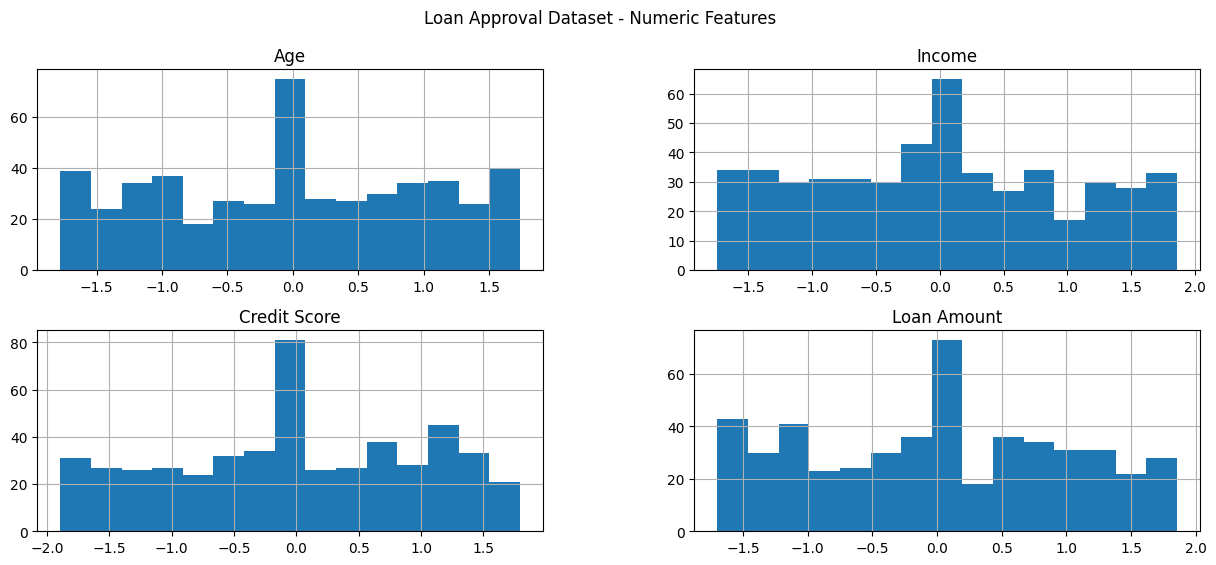

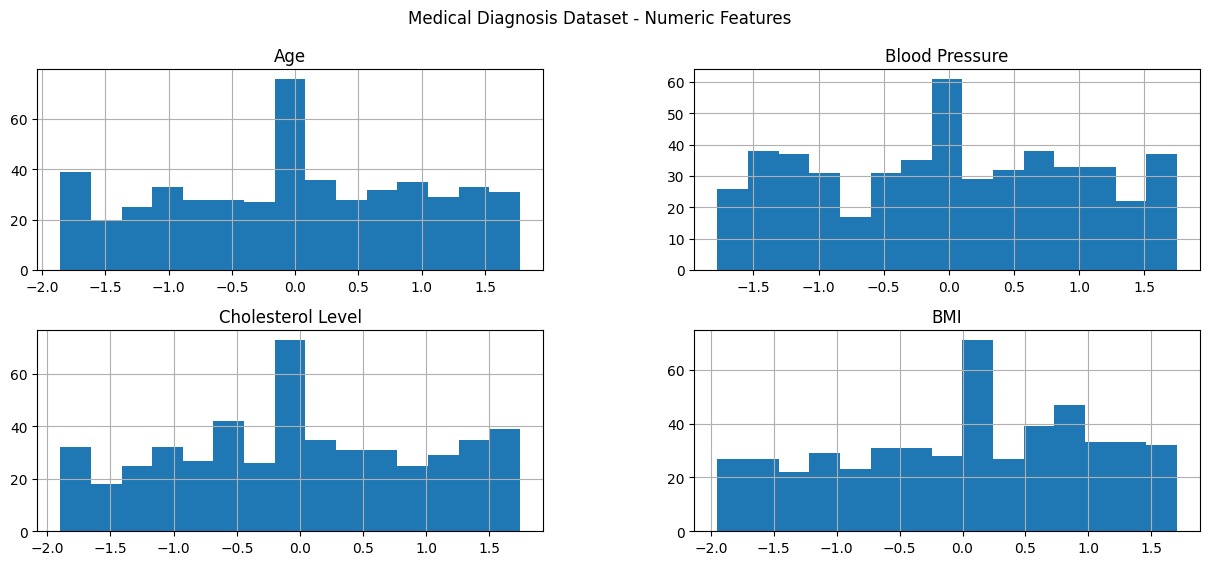

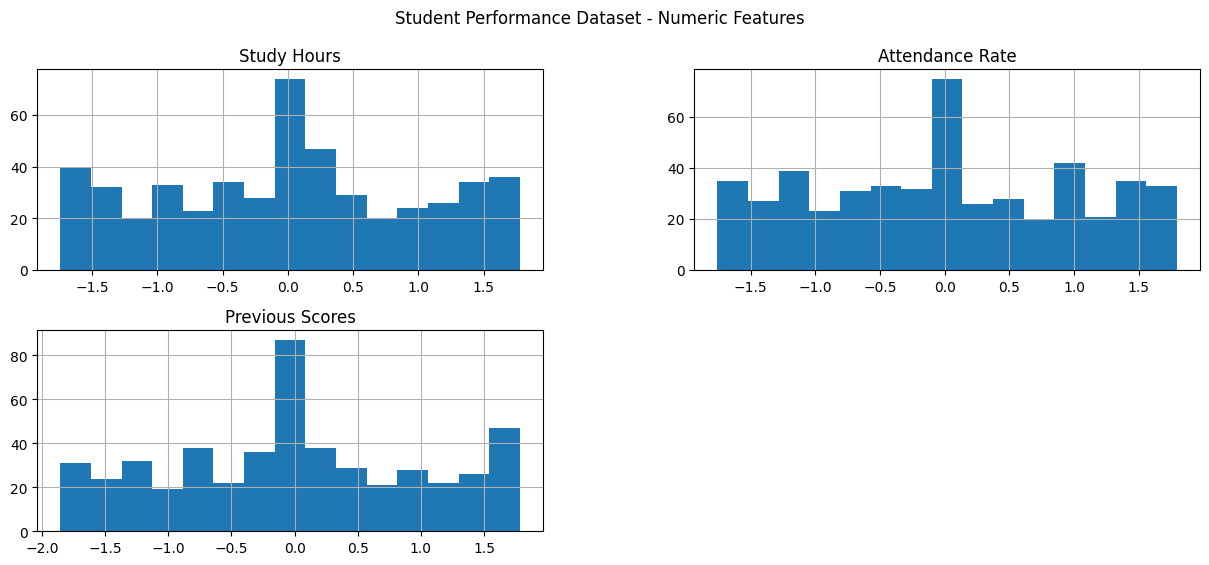

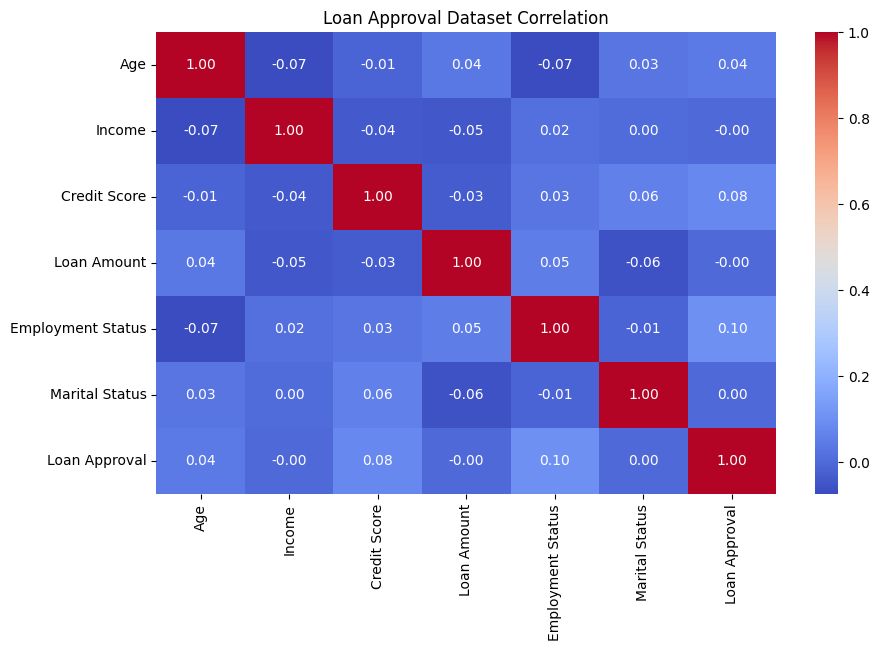

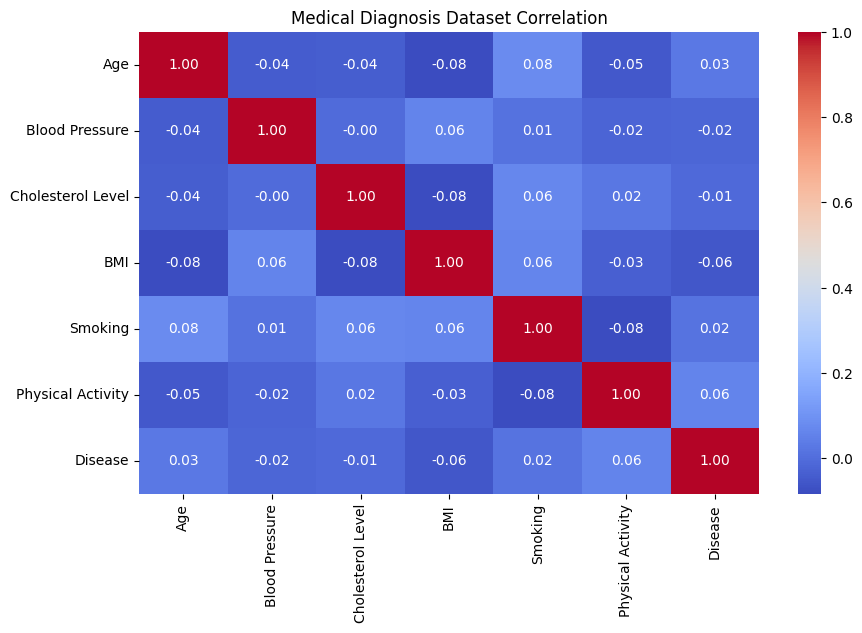

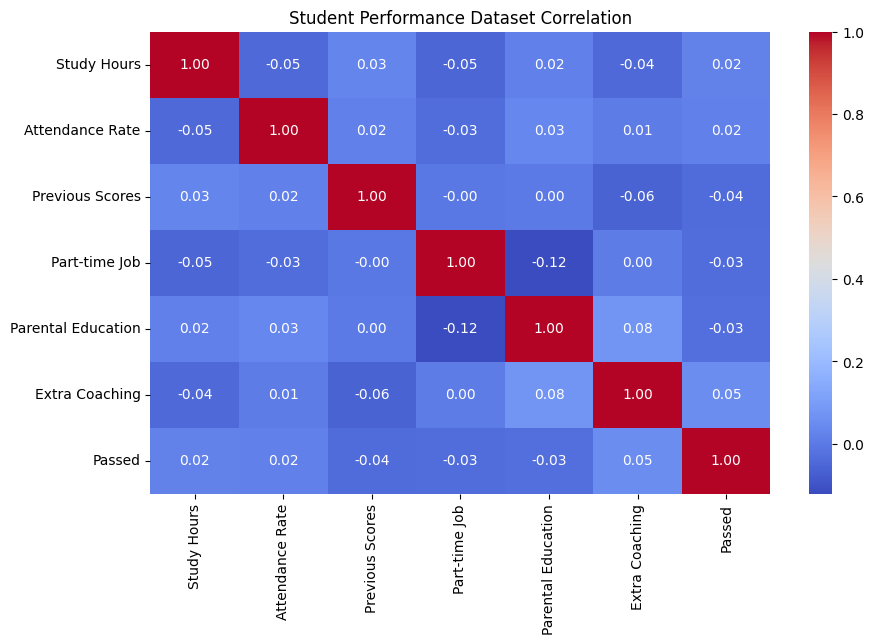

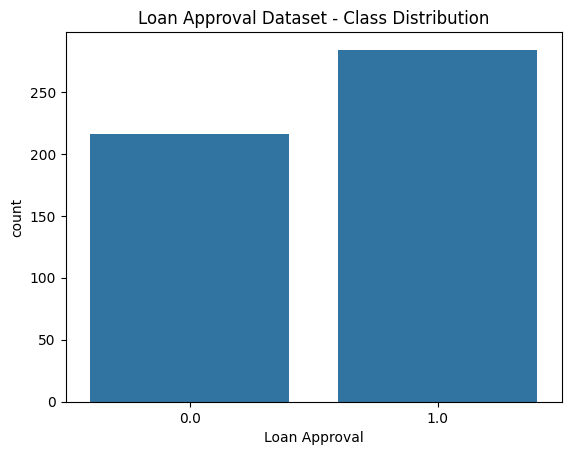

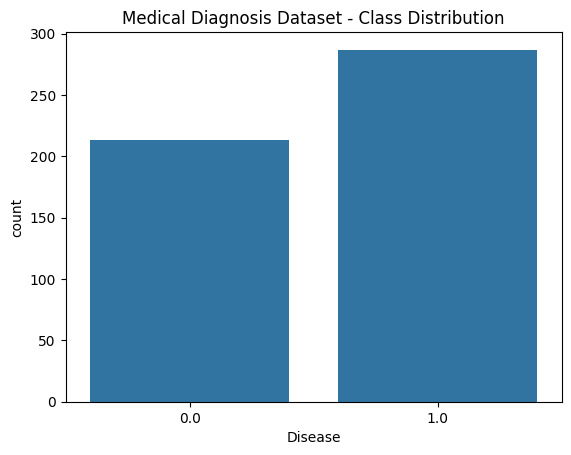

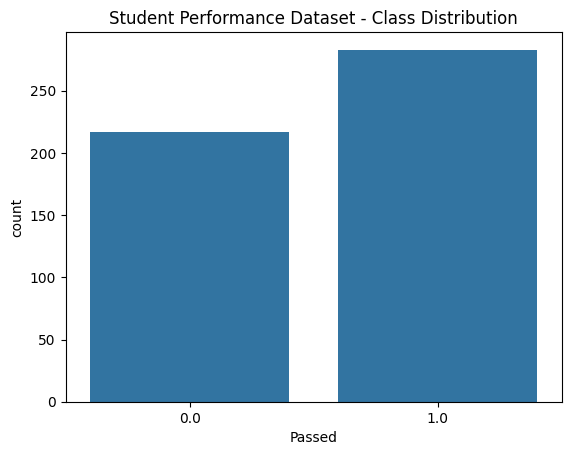

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt


def plot_histograms(df, numeric_cols, title):
    df[numeric_cols].hist(bins=15, figsize=(15, 6))
    plt.suptitle(title)
    plt.show()

plot_histograms(loan_approval_df, loan_approval_numeric_cols, 'Loan Approval Dataset - Numeric Features')
plot_histograms(medical_diagnosis_df, medical_diagnosis_numeric_cols, 'Medical Diagnosis Dataset - Numeric Features')
plot_histograms(student_performance_df, student_performance_numeric_cols, 'Student Performance Dataset - Numeric Features')

#Correlation heatmaps

def plot_heatmap(df, title):
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(title)
    plt.show()

plot_heatmap(loan_approval_df, 'Loan Approval Dataset Correlation')
plot_heatmap(medical_diagnosis_df, 'Medical Diagnosis Dataset Correlation')
plot_heatmap(student_performance_df, 'Student Performance Dataset Correlation')

# Visualizing class distribution (0 vs 1)

def plot_class_distribution(df, target_col, title):
    sns.countplot(x=target_col, data=df)
    plt.title(title)
    plt.show()

plot_class_distribution(loan_approval_df, 'Loan Approval', 'Loan Approval Dataset - Class Distribution')
plot_class_distribution(medical_diagnosis_df, 'Disease', 'Medical Diagnosis Dataset - Class Distribution')
plot_class_distribution(student_performance_df, 'Passed', 'Student Performance Dataset - Class Distribution')


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# model performance
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    return accuracy, precision, recall, f1, roc_auc

X_loan = loan_approval_df.drop(columns='Loan Approval')
y_loan = loan_approval_df['Loan Approval']

X_medical = medical_diagnosis_df.drop(columns='Disease')
y_medical = medical_diagnosis_df['Disease']

X_student = student_performance_df.drop(columns='Passed')
y_student = student_performance_df['Passed']

X_train_loan, X_test_loan, y_train_loan, y_test_loan = train_test_split(X_loan, y_loan, test_size=0.2, random_state=42)
X_train_medical, X_test_medical, y_train_medical, y_test_medical = train_test_split(X_medical, y_medical, test_size=0.2, random_state=42)
X_train_student, X_test_student, y_train_student, y_test_student = train_test_split(X_student, y_student, test_size=0.2, random_state=42)

# Initialize models
knn = KNeighborsClassifier(n_neighbors=5)
nb = GaussianNB()
log_reg = LogisticRegression()

# Evaluate models on each dataset
models = {'KNN': knn, 'Naive Bayes': nb, 'Logistic Regression': log_reg}

for name, model in models.items():
    print(f"Model: {name} - Loan Approval Dataset")
    print(evaluate_model(model, X_train_loan, X_test_loan, y_train_loan, y_test_loan))

    print(f"Model: {name} - Medical Diagnosis Dataset")
    print(evaluate_model(model, X_train_medical, X_test_medical, y_train_medical, y_test_medical))

    print(f"Model: {name} - Student Performance Dataset")
    print(evaluate_model(model, X_train_student, X_test_student, y_train_student, y_test_student))


Model: KNN - Loan Approval Dataset
(0.47, 0.5555555555555556, 0.5833333333333334, 0.5691056910569106, 0.44562500000000005)
Model: KNN - Medical Diagnosis Dataset
(0.51, 0.6229508196721312, 0.59375, 0.608, 0.4605034722222222)
Model: KNN - Student Performance Dataset
(0.52, 0.5441176470588235, 0.6851851851851852, 0.6065573770491803, 0.517914653784219)
Model: Naive Bayes - Loan Approval Dataset
(0.58, 0.6071428571428571, 0.85, 0.7083333333333334, 0.5466666666666666)
Model: Naive Bayes - Medical Diagnosis Dataset
(0.63, 0.6753246753246753, 0.8125, 0.7375886524822695, 0.5390625)
Model: Naive Bayes - Student Performance Dataset
(0.55, 0.5463917525773195, 0.9814814814814815, 0.7019867549668874, 0.5442834138486312)
Model: Logistic Regression - Loan Approval Dataset
(0.62, 0.627906976744186, 0.9, 0.7397260273972602, 0.58875)
Model: Logistic Regression - Medical Diagnosis Dataset
(0.57, 0.6363636363636364, 0.765625, 0.6950354609929078, 0.43402777777777773)
Model: Logistic Regression - Student Pe